# Hopf (S³ → S²) and SO(3) circle bundles

This notebook demonstrates the core `circle_bundles` pipeline on samplings from two canonical datasets:

- Hopf fibration data (S³ → S²), expected to be orientable with Euler number ±1.
- SO(3) data projected to S², expected to be orientable with Euler number ±2.

A brief description of the two projection maps and their relationship via the adjoint map is provided below.

$\textbf{Introduction:}$ Consider the map $h:\mathbb{S}^{3}\to\mathbb{S}^{2}$ defined by $h(q) = qiq^{-1}$, where $\mathbb{S}^{3}$ is naturally identified with the set of unit quaternions via $(x_{0}, x_{1}, x_{2}, x_{3})\leftrightarrow x_{0} + x_{1}i +x_{2}j +x_{3}k$ and $\mathbb{S}^{2}$ is identified with the 'equator' $x_{0} = 0$ in $\mathbb{S}^{3}$ consisting of pure imaginary quaternions. One can show that this map is an orientable circle bundle over $\mathbb{S}^{2}$ with Euler number $\pm 1$. 

Similarly, the space $SO(3)$ of orientation-preserving isometries of $\mathbb{R}^{3}$ admits a circle bundle structure over $\mathbb{S}^{2}$ given by $\tilde{h}(A) = Ae_{1}$, where $e_{1}$ denotes the first standard basis vector in $\mathbb{R}^{3}$. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import circle_bundles as cb
import circle_bundles.synthetic as sy
import circle_bundles.viz as vz

Generate a sampling of the 3-sphere, represented as 4D-vectors

In [7]:
n_samples = 5000
rng = np.random.default_rng(0)
s3_data = sy.sample_sphere(n_samples,3, rng=rng)

Generated 5000 samples of S3, represented as 4D-vectors.


Note that the only non-trivial (reduced) homology of $\mathbb{S}^{3}$ is in dimension 3, so we have no hope of verifying the global topology of the dataset with a direct persistent homology computation.  

For the local-to-global analysis, first compute base projections to $\mathbb{S}^{2}$.

In [22]:
v = np.array([1.0, 0.0, 0.0])
base_points = sy.hopf_projection(s3_data, v = v)


Construct an open cover for $\mathbb{S}^{2}$ around nearly equally-spaced landmark points (see documentation for details).

### Cover And Nerve Summary
- $n_\text{sets} = 60$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 60$
- $\#(\text{1-simplices}) = 174$
- $\#(\text{2-simplices}) = 116$
- *No recorded simplices in dimensions* $\ge 3$

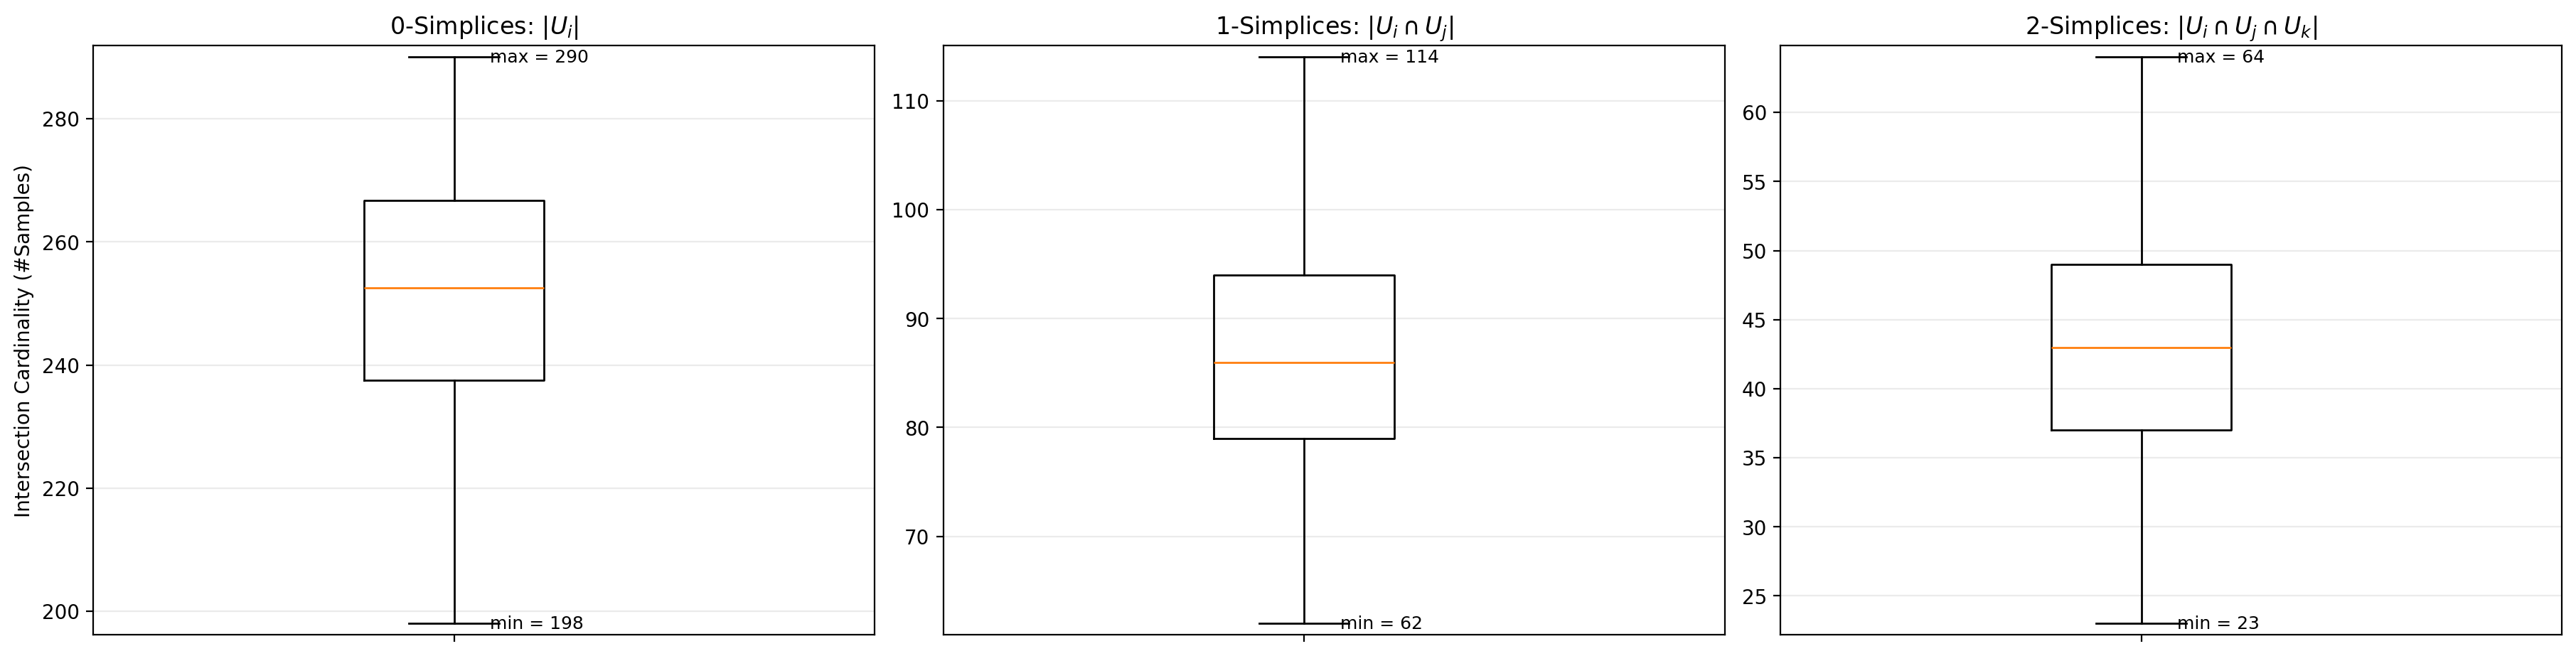

In [10]:
n_landmarks = 60
s2_cover = cb.make_s2_fibonacci_star_cover(base_points, n_vertices = n_landmarks)

summ = s2_cover.summarize(plot = True)

Notice that the Euler characteristic for the nerve of our (good) open cover is $\chi = 60 - 174 + 116 = 2$, which is consistent with $\mathbb{S}^{2}$. Furthermore, our cover is especially simple in that it has no 3-simplices.  Run the cell below to optionally view an interactive visualization of the nerve.  

In [14]:
fig = s2_cover.show_nerve()
plt.show()

Compute a persistence diagram for the data in each set $\pi^{-1}(U_{j})$

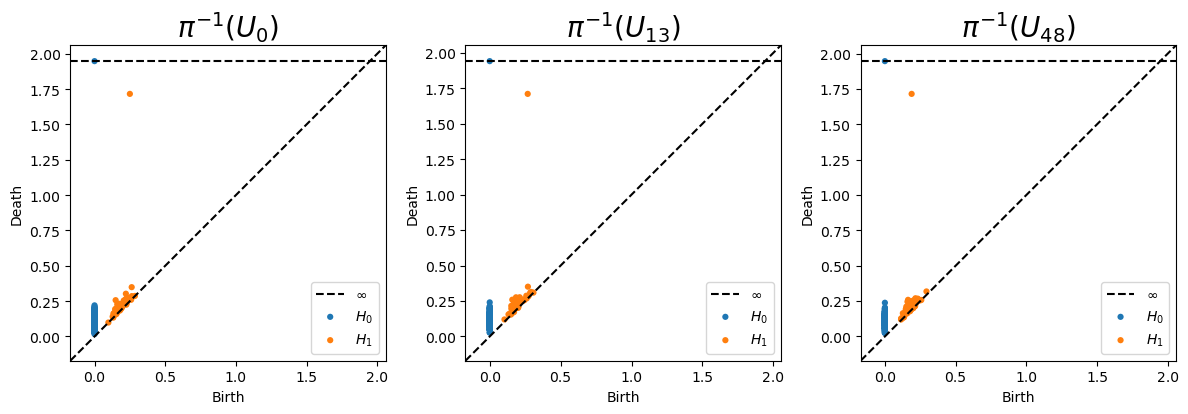

In [19]:
fiber_ids, dense_idx_list, rips_list = cb.get_local_rips(
    s3_data,
    s2_cover.U,
    p_values=None,
    to_view = [0,13,48], #Choose a few diagrams to compute 
                       #(or compute all by setting to None)
    maxdim=1,
    n_perm=500,
    random_state=None,
)

fig, axes = cb.plot_local_rips(
    fiber_ids,
    rips_list,
    n_cols=3,
    titles='default',
    font_size=20,
)

Observe that each $\pi^{-1}(U_{j})$ has a single 1-dimensional (circular) persistent feature, supporting the hypothesis that the data has the structure of a discrete approximate circle bundle over $\mathbb{S}^{2}$.

Now, construct a bundle object to compute local circular coordinates, approximate transition matrices and characteristic classes: 

In [15]:
s3_bundle = cb.build_bundle(
    s3_data,
    s2_cover,
    show=True,
)


<IPython.core.display.Math object>

Next, use the adjoint map to construct (flattened) $SO(3)$ matrices from the samples in $\mathbb{S}^{3}$

In [18]:
so3_data = sy.spin3_adjoint_to_so3(s3_data)

As a sanity check, verify the $SO(3)$ matrices have the same $\mathbb{S}^{2}$ projections as the original $\mathbb{S}^{3}$ samples 


In [ ]:
so3_base_points = cb.so3_to_s2_projection(so3_data, v= v)

assert np.allclose(so3_base_points, base_points)
print("Projections agree")

Compute local persistence diagrams for the $SO(3)$ data subordinate to the same open cover

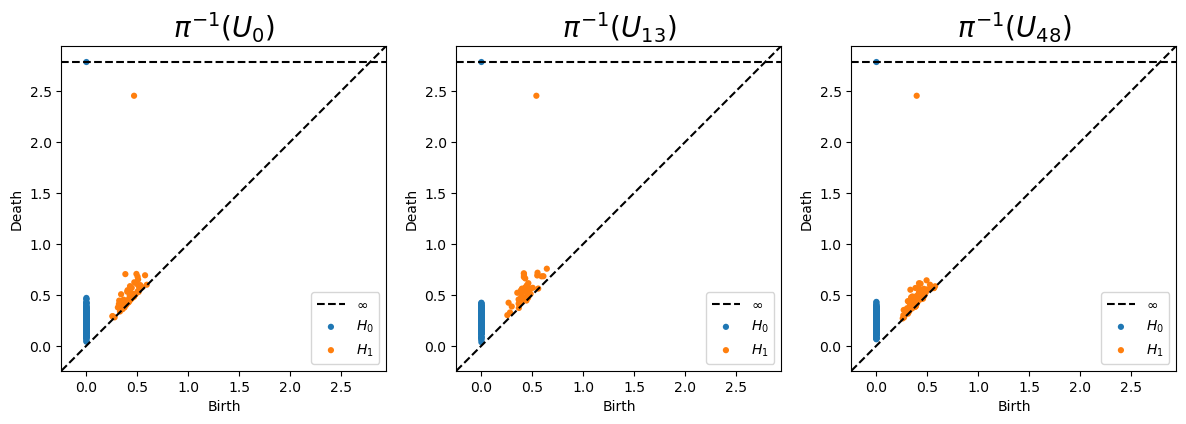

In [20]:
fiber_ids, dense_idx_list, rips_list = cb.get_local_rips(
    so3_data,
    s2_cover.U,
    p_values=None,
    to_view = [0,13,48], #Choose a few diagrams to compute 
                       #(or compute all by setting to None)
    maxdim=1,
    n_perm=500,
    random_state=None,
)

fig, axes = cb.plot_local_rips(
    fiber_ids,
    rips_list,
    n_cols=3,
    titles='default',
    font_size=20,
)

Observe that local persistence computations cannot distinguish the $\mathbb{S}^{3}$ dataset from the $SO(3)$ dataset; each has a single 1-dimensional (circular) persistent feature over each open set. 

Finally, run the main bundle construction pipeline for the $SO(3)$ data

In [23]:
so3_bundle = cb.build_bundle(
    so3_data,
    s2_cover,
    show=True,
)


<IPython.core.display.Math object>

Observe that our bundle pipeline captures the difference in global topology between the two datasets.  